In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft

In [2]:
data1 = pd.read_excel('Data/1.xlsx')
data2 = pd.read_excel('Data/2.xlsx')
data3 = pd.read_excel('Data/3.xlsx')
data4 = pd.read_excel('Data/4.xlsx')
data5 = pd.read_excel('Data/5.xlsx')

data = [data1,data2,data3,data4,data5]
data1.head()

,ax,ay,az
0,-0.231691,1.353950,-1.72867
1,-0.204991,0.626211,-1.08421
2,0.019562,-1.069100,0.57542
3,0.019562,-1.069100,0.57542
4,0.088275,-1.661130,2.03864


In [3]:
print(data1.shape)

(23296, 3)


In [4]:
data1.describe()

,ax,ay,az
count,23296.000000,23296.000000,23296.000000
mean,-0.001129,0.050302,0.058946
std,0.089374,0.461188,0.464619
min,-0.861831,-2.550070,-2.862410
25%,-0.050418,-0.162207,-0.133704
50%,-0.002926,0.048728,0.072689
75%,0.049464,0.275673,0.239749
max,0.431570,2.550140,2.889450


In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ax      23296 non-null  float64
 1   ay      23296 non-null  float64
 2   az      23296 non-null  float64
dtypes: float64(3)
memory usage: 546.1 KB


In [6]:
data1.duplicated().sum()

np.int64(9774)

In [7]:
data1.drop_duplicates(inplace=True)
data1.shape

(13522, 3)

In [8]:
def Calculate_Measure(dataset):
    measures = {'Mesure': ['Moyenne', 'Médiane', 'Variance', 'Q0:Min', 'Q1', 'Q2', 'Q3', 'Q4:Max' , 'Ecart-type', 'Skewness', 'Kurtosis'  ]}
    
    # Loop through each column in the dataset
    for col in dataset.columns[:]:
        measures[col] = [
            dataset[col].mean().round(2), 
            round(dataset[col].median(), 2),
            round(dataset[col].var(), 2), 
            sorted(dataset[col])[0], 
            dataset[col].quantile(0.25),
            dataset[col].quantile(0.5),
            dataset[col].quantile(0.75),
            sorted(dataset[col])[-1],
            round(dataset[col].std(), 2),
            round(dataset[col].skew(), 2),
            dataset[col].kurtosis(),
        ]
    
    # Create a DataFrame from the dictionary
    Mesure_tendance_centrale = pd.DataFrame(measures)
    
    return Mesure_tendance_centrale

# Assuming 'dataset' is your DataFrame
Mesure_tendance_centrale = Calculate_Measure(data1)
Mesure_tendance_centrale

,Mesure,ax,ay,az
0,Moyenne,-0.000000,0.050000,0.060000
1,Médiane,-0.000000,0.050000,0.070000
2,Variance,0.010000,0.210000,0.210000
3,Q0:Min,-0.861831,-2.550070,-2.862410
4,Q1,-0.050398,-0.154976,-0.133043
5,Q2,-0.002827,0.047845,0.072149
6,Q3,0.048292,0.273193,0.235416
7,Q4:Max,0.431570,2.550140,2.889450
8,Ecart-type,0.090000,0.460000,0.460000
9,Skewness,-0.150000,0.010000,0.040000


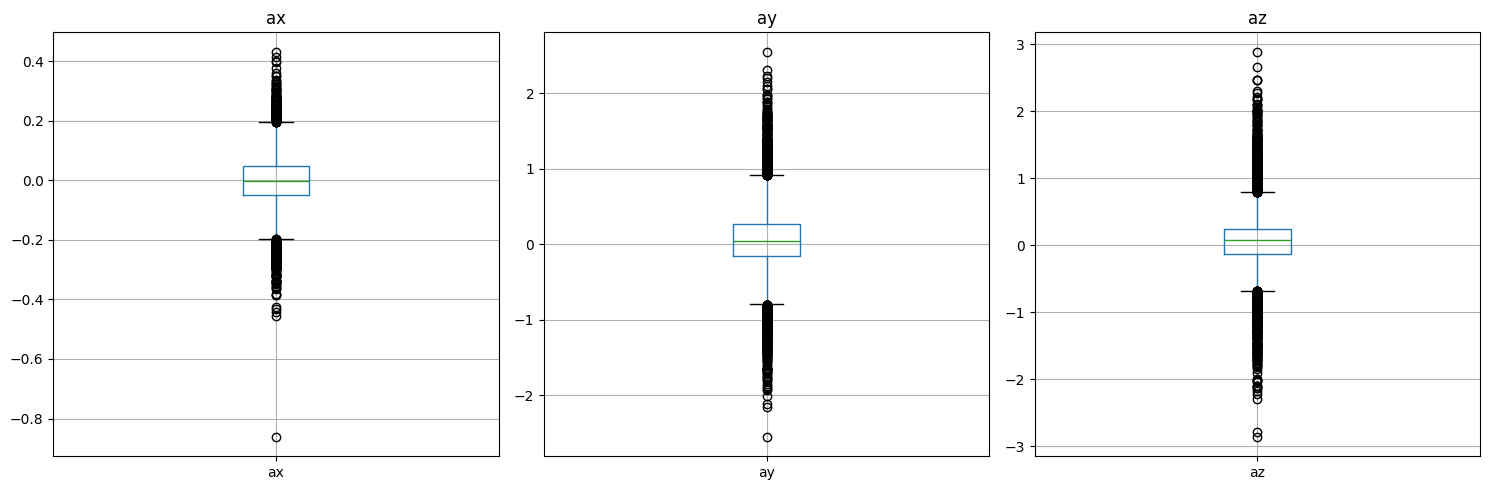

In [9]:
def create_box_plots(data):
    num_cols = len(data.columns)
    num_rows = num_cols // 3 + (num_cols % 3 > 0)  # Calculate the number of rows needed

    _, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))  # Create subplots
    
    for i, col in enumerate(data.columns):
        ax = axes[i // 3, i % 3] if num_rows > 1 else axes[i % 3] 
        data.boxplot(column=col, ax=ax)
        ax.set_title(col)  
    
    plt.tight_layout()
    plt.show()

create_box_plots(data1)

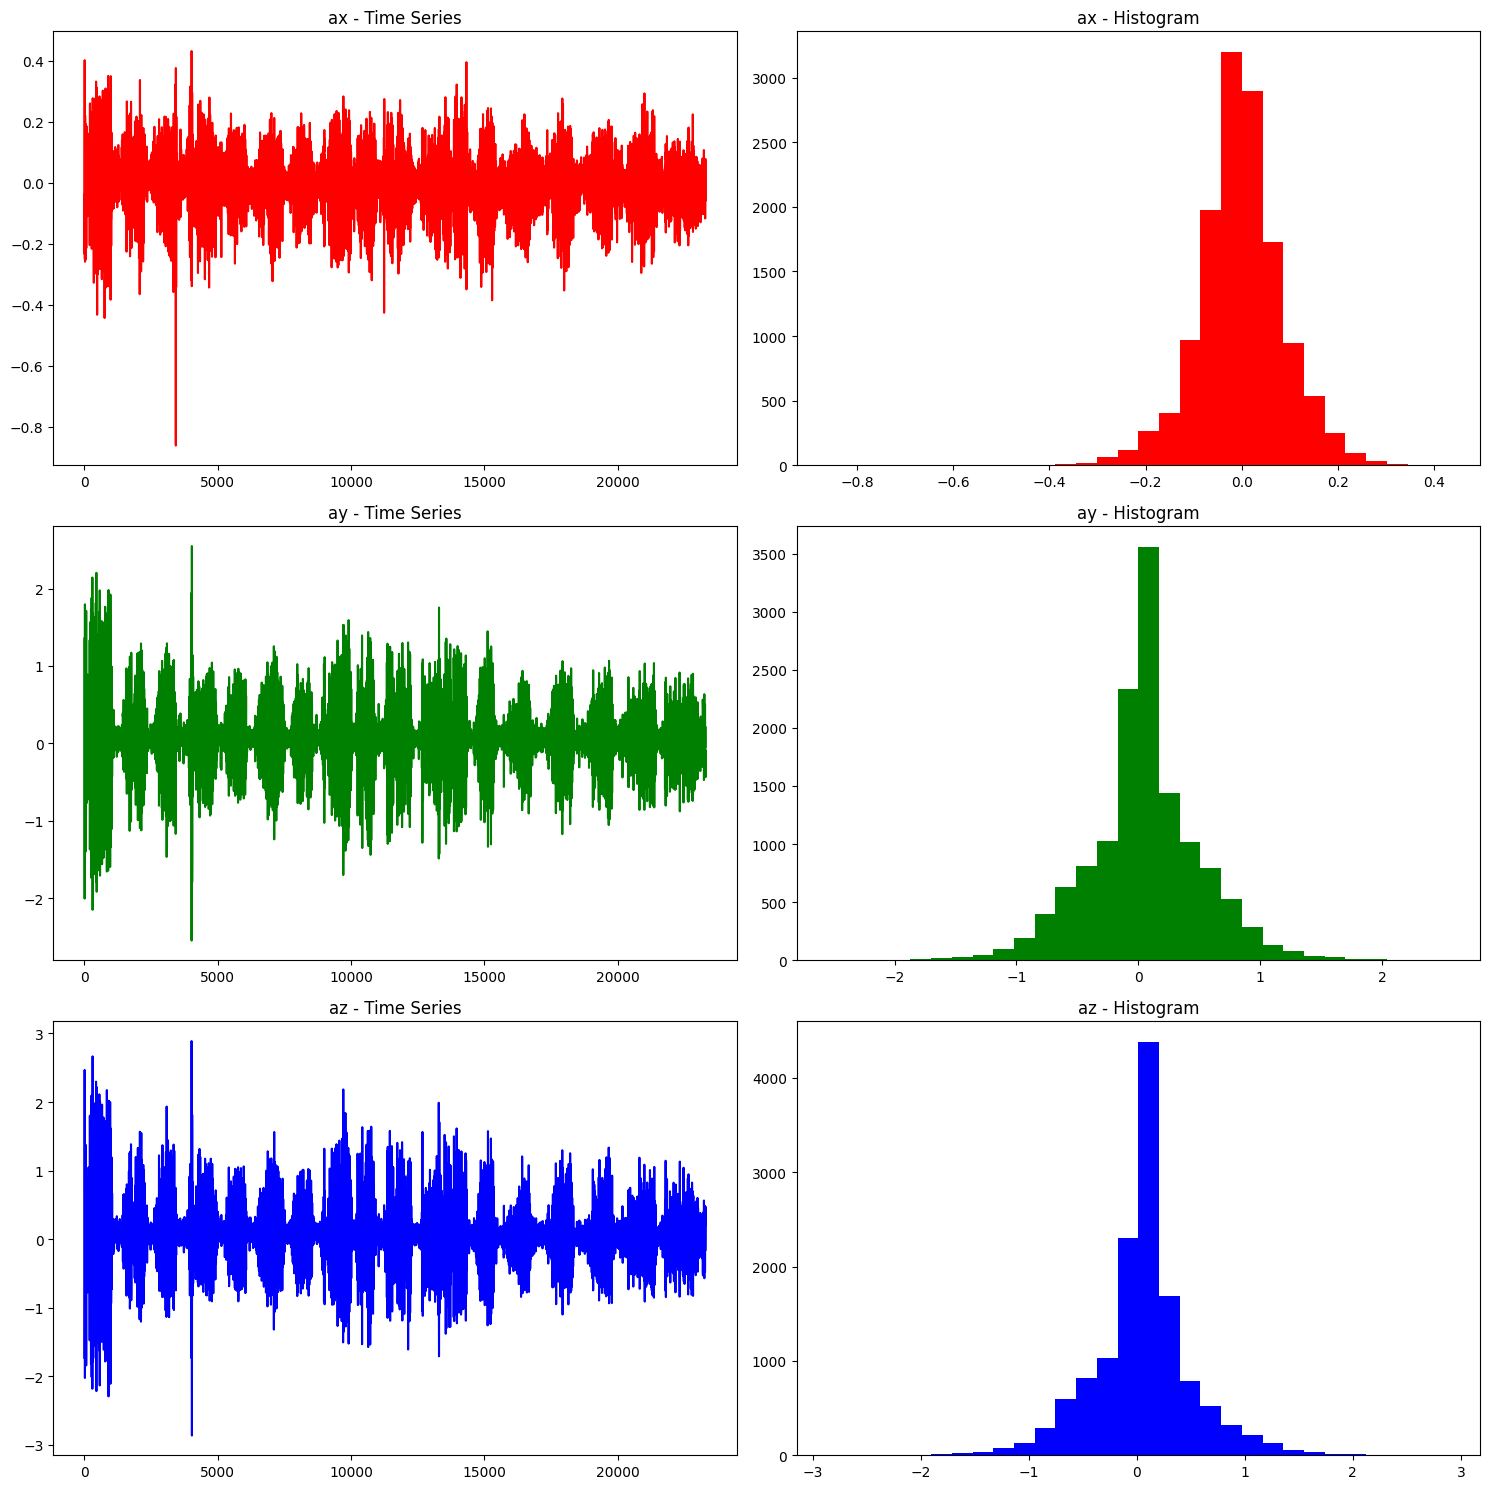

In [10]:
import matplotlib.pyplot as plt

# Créer une figure avec 3 lignes et 2 colonnes
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Série temporelle pour 'ax'
data1['ax'].plot(ax=axes[0, 0], title='ax - Time Series', color='red')
axes[0, 1].hist(data1['ax'], bins=30, color='red')
axes[0, 1].set_title('ax - Histogram')

# Série temporelle pour 'ay'
data1['ay'].plot(ax=axes[1, 0], title='ay - Time Series', color='green')
axes[1, 1].hist(data1['ay'], bins=30, color='green')
axes[1, 1].set_title('ay - Histogram')

# Série temporelle pour 'az'
data1['az'].plot(ax=axes[2, 0], title='az - Time Series', color='blue')
axes[2, 1].hist(data1['az'], bins=30, color='blue')
axes[2, 1].set_title('az - Histogram')

# Ajuster l'espacement
plt.tight_layout()

# Afficher la figure
plt.show()


In [11]:
data1.shape

(13522, 3)

## Features:

In [12]:
def mean(window):
    ax = window['ax'].mean()
    ay = window['ay'].mean()
    az = window['az'].mean()
    return ax, ay, az

def root_mean_square(window):
    rms_ax = np.sqrt(np.mean(window['ax']**2))
    rms_ay = np.sqrt(np.mean(window['ay']**2))
    rms_az = np.sqrt(np.mean(window['az']**2))
    return rms_ax, rms_ay, rms_az

def standard_deviation(window):
    std_ax = np.std(window['ax'])
    std_ay = np.std(window['ay'])
    std_az = np.std(window['az'])
    return std_ax, std_ay, std_az

def pearson_correlation(window):
    corr_xy = window['ax'].corr(window['ay'])
    corr_xz = window['ax'].corr(window['az'])
    corr_yx = window['ay'].corr(window['ax'])
    return corr_xy, corr_xz, corr_yx

def signal_magnitude_vector(window):
    return np.sqrt(window['ax']**2 + window['ay']**2 + window['az']**2)

def interquartile_range(window):
    iqr_ax = window['ax'].quantile(0.75) - window['ax'].quantile(0.25)
    iqr_ay = window['ay'].quantile(0.75) - window['ay'].quantile(0.25)
    iqr_az = window['az'].quantile(0.75) - window['az'].quantile(0.25)
    return iqr_ax, iqr_ay, iqr_az

def max_min(window):
    max_ax = window['ax'].max() - window['ax'].min()
    max_ay = window['ay'].max() - window['ay'].min()
    max_az = window['az'].max() - window['az'].min()
    return max_ax, max_ay, max_az

def kurtosis(window):
    kurtosis_ax = window['ax'].kurtosis()
    kurtosis_ay = window['ay'].kurtosis()
    kurtosis_az = window['az'].kurtosis()
    return kurtosis_ax, kurtosis_ay, kurtosis_az

def skewness(window):
    skewness_ax = window['ax'].skew()
    skewness_ay = window['ay'].skew()
    skewness_az = window['az'].skew()
    return skewness_ax, skewness_ay, skewness_az

def mean_frequency_power(window):
    freq_ax = np.mean(np.abs(fft(window['ax'])))
    freq_ay = np.mean(np.abs(fft(window['ay'])))
    freq_az = np.mean(np.abs(fft(window['az'])))
    return freq_ax, freq_ay, freq_az

## POWER SPECTRAL DENSITY:

In [13]:
import numpy as np
from scipy.signal import welch

def compute_psd_label(signal, fs):
    freqs, psd = welch(signal, fs=fs, nperseg=len(signal))
    dominant_freq = freqs[np.argmax(psd)]
    return dominant_freq, 1 if 4 <= dominant_freq <= 8 else 0

In [ ]:
def moving_window_feature_extraction(data, window_size, step_size=1, fs=100):

    features_list = []
    total_samples = len(data)

    # Itération sur les fenêtres
    for start in range(0, total_samples - window_size + 1, step_size):
        end = start + window_size
        window = data.iloc[start:end]

        mean_values = mean(window)
        rms_values = root_mean_square(window)
        std_values = standard_deviation(window)
        corr_values = pearson_correlation(window)
        iqr_values = interquartile_range(window)
        max_min_values = max_min(window)
        kurtosis_values = kurtosis(window)
        skewness_values = skewness(window)
        mean_freq_power_values = mean_frequency_power(window)

        smv_values = signal_magnitude_vector(window)
        smv_mean = smv_values.mean()
        smv_max = smv_values.max()
        smv_min = smv_values.min()

        dominant_freq_ax, label_ax = compute_psd_label(window['ax'], fs)
        dominant_freq_ay, label_ay = compute_psd_label(window['ay'], fs)
        dominant_freq_az, label_az = compute_psd_label(window['az'], fs)

        label_global = 1 if any([label_ax, label_ay, label_az]) else 0 # 1 si au moins un label est 1, 0 sinon


        features = {
            'start_index': start,
            'end_index': end,
            'mean_ax': mean_values[0],
            'mean_ay': mean_values[1],
            'mean_az': mean_values[2],
            'rms_ax': rms_values[0],
            'rms_ay': rms_values[1],
            'rms_az': rms_values[2],
            'std_ax': std_values[0],
            'std_ay': std_values[1],
            'std_az': std_values[2],
            'corr_xy': corr_values[0],
            'corr_xz': corr_values[1],
            'corr_yz': corr_values[2],
            'smv_mean': smv_mean,
            'smv_max': smv_max,
            'smv_min': smv_min,
            'iqr_ax': iqr_values[0],
            'iqr_ay': iqr_values[1],
            'iqr_az': iqr_values[2],
            'max_min_ax': max_min_values[0],
            'max_min_ay': max_min_values[1],
            'max_min_az': max_min_values[2],
            'kurtosis_ax': kurtosis_values[0],
            'kurtosis_ay': kurtosis_values[1],
            'kurtosis_az': kurtosis_values[2],
            'skewness_ax': skewness_values[0],
            'skewness_ay': skewness_values[1],
            'skewness_az': skewness_values[2],
            'mean_freq_power_ax': mean_freq_power_values[0],
            'mean_freq_power_ay': mean_freq_power_values[1],
            'mean_freq_power_az': mean_freq_power_values[2],
            'dominant_freq_ax': dominant_freq_ax,
            'dominant_freq_ay': dominant_freq_ay,
            'dominant_freq_az': dominant_freq_az,
            'label_ax': label_ax,
            'label_ay': label_ay,
            'label_az': label_az,
            'label': label_global
        }

        features_list.append(features)

    # Conversion en DataFrame
    features_df = pd.DataFrame(features_list)

    return features_df


window_size = [10,30]
step_size = 1
features = moving_window_feature_extraction(data1, window_size, step_size, fs=100) # fs est la fréquence d'échantillonnage

features.head()

In [16]:
# check how many labels are 1 and 0
features['label'].value_counts()

label
0    8838
1    4665
Name: count, dtype: int64

<Axes: >

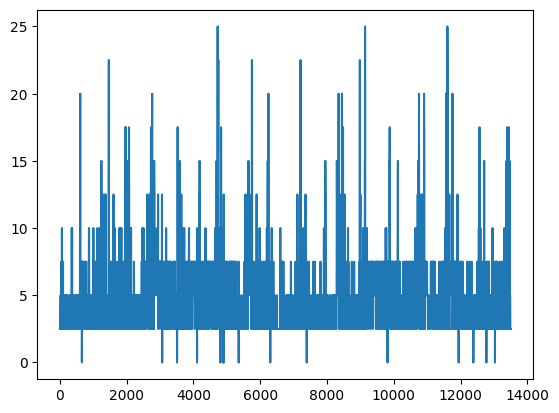

In [17]:
features['dominant_freq_ax'].plot()

In [5]:
import pandas as pd
from features import *

# Charger les données non filtrées
data1 = pd.read_excel('Data/1.xlsx')
data2 = pd.read_excel('Data/2.xlsx')
data3 = pd.read_excel('Data/3.xlsx')
data4 = pd.read_excel('Data/4.xlsx')
data5 = pd.read_excel('Data/5.xlsx')
data = [data1, data2, data3, data4, data5]

# Charger les données filtrées
data1_f = pd.read_excel('Data/filtred_data/1.xlsx')
data2_f = pd.read_excel('Data/filtred_data/2.xlsx')
data3_f = pd.read_excel('Data/filtred_data/3.xlsx')
data4_f = pd.read_excel('Data/filtred_data/4.xlsx')
data5_f = pd.read_excel('Data/filtred_data/5.xlsx')
filtred_data = [data1_f, data2_f, data3_f, data4_f, data5_f]


def moving_window_feature_extraction(data, window_size, step_size=1, fs=100):
    """
    Extract features for each moving window.
    """
    features_list = []
    total_samples = len(data)

    # Iteration over windows
    for start in range(0, total_samples - window_size + 1, step_size):
        end = start + window_size
        window = data.iloc[start:end]

        # Compute specific features for each axis
        dominant_freq_ax, label_ax = compute_psd_label(window['ax'], fs)
        dominant_freq_ay, label_ay = compute_psd_label(window['ay'], fs)
        dominant_freq_az, label_az = compute_psd_label(window['az'], fs)

        # Append selected features for all axes
        features = {
            'ax_original': list(window['ax']),  # All original 'ax' values in the window
            'mean_ax': window['ax'].mean(),    # Mean value of 'ax' in the window
            'lx': label_ax,                    # Label for 'ax'
            'fdx': dominant_freq_ax, 
                      
                                # Dominant frequency of 'ax'
            'ay_original': list(window['ay']),  # All original 'ay' values in the window
            'ay': window['ay'].mean(),         # Mean value of 'ay' in the window
            'ly': label_ay,                    # Label for 'ay'
            'fdy': dominant_freq_ay,           # Dominant frequency of 'ay'

            'az_original': list(window['az']),  # All original 'az' values in the window
            'az': window['az'].mean(),         # Mean value of 'az' in the window
            'lz': label_az,                    # Label for 'az'
            'fdz': dominant_freq_az            # Dominant frequency of 'az'
        }

        features_list.append(features)

    # Convert to DataFrame
    features_df = pd.DataFrame(features_list)
    return features_df


def preprocess_data(data, output_folder, window_size, step_size, fs):
    """
    Preprocess data to extract specific columns and save as CSV.
    """
    for i in range(len(data)):
        # Extract features for the given window size
        features_df = moving_window_feature_extraction(data[i], window_size, step_size, fs)

        # Save as CSV
        output_file = f'{output_folder}/data_{i + 1}_filtered.csv' if 'filtred' in output_folder.lower() else f'{output_folder}/data_{i + 1}.csv'
        features_df.to_csv(output_file, index=False)
        print(f"File saved: {output_file}")


if __name__ == '__main__':
    window_size = 50
    step_size = 1
    fs = 100

    # Process non-filtered data
    preprocess_data(data, 'Data_Preprocessed1', window_size, step_size, fs)

    # Process filtered data
    preprocess_data(filtred_data, 'Data_Preprocessed1/Filtred', window_size, step_size, fs)


File saved: Data_Preprocessed1/data_1.csv
File saved: Data_Preprocessed1/data_2.csv
File saved: Data_Preprocessed1/data_3.csv
File saved: Data_Preprocessed1/data_4.csv
File saved: Data_Preprocessed1/data_5.csv
File saved: Data_Preprocessed1/Filtred/data_1_filtered.csv
File saved: Data_Preprocessed1/Filtred/data_2_filtered.csv
File saved: Data_Preprocessed1/Filtred/data_3_filtered.csv
File saved: Data_Preprocessed1/Filtred/data_4_filtered.csv
File saved: Data_Preprocessed1/Filtred/data_5_filtered.csv


# read preprocessed data

In [3]:
data_1_20 = pd.read_csv('Data_Preprocessed/data_1_20.csv')
data_1_50 = pd.read_csv('Data_Preprocessed/data_1_50.csv')

# calculate number of dominant_freq_ax entre `4` et `8`
print('number of dominant frequency between 4hz and 8hz in ax axes is ',data_1_20['dominant_freq_ax'].between(4, 8).sum()) 
print('number of dominant frequency between 4hz and 8hz in ay axes is ',data_1_20['dominant_freq_ay'].between(4, 8).sum())
print('number of dominant frequency between 4hz and 8hz in az axes is ',data_1_20['dominant_freq_az'].between(4, 8).sum())

number of dominant frequency between 4hz and 8hz in ax axes is  17063
number of dominant frequency between 4hz and 8hz in ay axes is  21157
number of dominant frequency between 4hz and 8hz in az axes is  20526


In [4]:
x = [20,50,80,100,150]
def statistics():
    result_table = []
    for i in x:
        data = pd.read_csv(f'Data_Preprocessed/data_1_{i}.csv')
        
        mv_window = i
        nb_freq_dom_ax = data['dominant_freq_ax'].between(4, 8).sum()  
        nb_freq_dom_ay = data['dominant_freq_ay'].between(4, 8).sum()  
        nb_freq_dom_az = data['dominant_freq_az'].between(4, 8).sum()  
        nb_label = (data['label'] == 1).sum()  

        # Ajouter les résultats dans la table
        result_table.append({
            'mv_window': mv_window,
            'nb_freq_dom_ax': nb_freq_dom_ax,
            'nb_freq_dom_ay': nb_freq_dom_ay,
            'nb_freq_dom_az': nb_freq_dom_az,
            'len(data)': len(data),
            'nb_label': nb_label
            })
    result_df = pd.DataFrame(result_table)
    return result_df

statistics()

,mv_window,nb_freq_dom_ax,nb_freq_dom_ay,nb_freq_dom_az,len(data),nb_label
0,20,17063,21157,20526,23277,22896
1,50,21722,21737,21986,23247,23159
2,80,7813,5161,6681,23217,11327
3,100,21311,21007,21407,23197,22991
4,150,19760,18462,19039,23147,22245


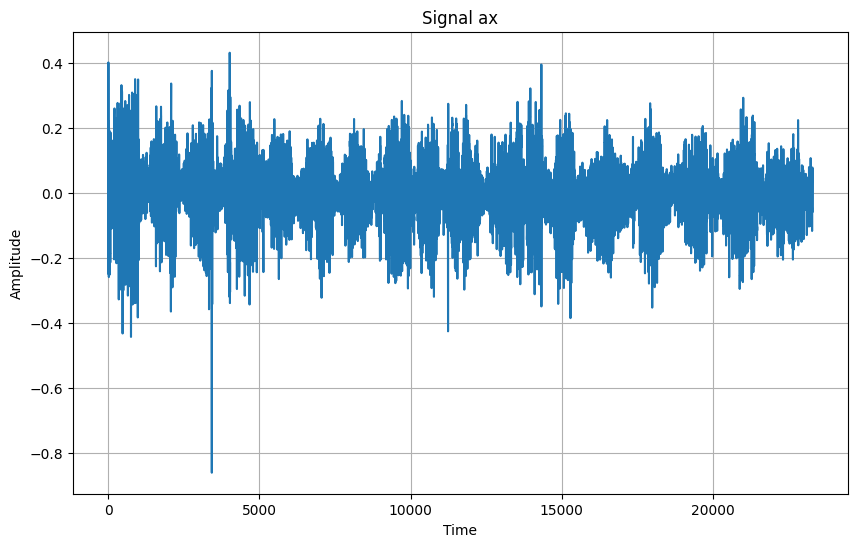

In [10]:
data1 = pd.read_excel('Data/1.xlsx')
# plotting ax signal
plt.figure(figsize=(10, 6))
plt.plot(data1['ax'])
plt.title('Signal ax')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

In [20]:
data_preprocessed = pd.read_csv('Data_Preprocessed/data_1_20.csv')
data1 = pd.read_excel('Data/1.xlsx')
print(f'la taille des donnees d acceleration {len(data1)}')
print(f'la taille des donnees des features {len(data_preprocessed)}')

la taille des donnees d acceleration 23296
la taille des donnees des features 23277


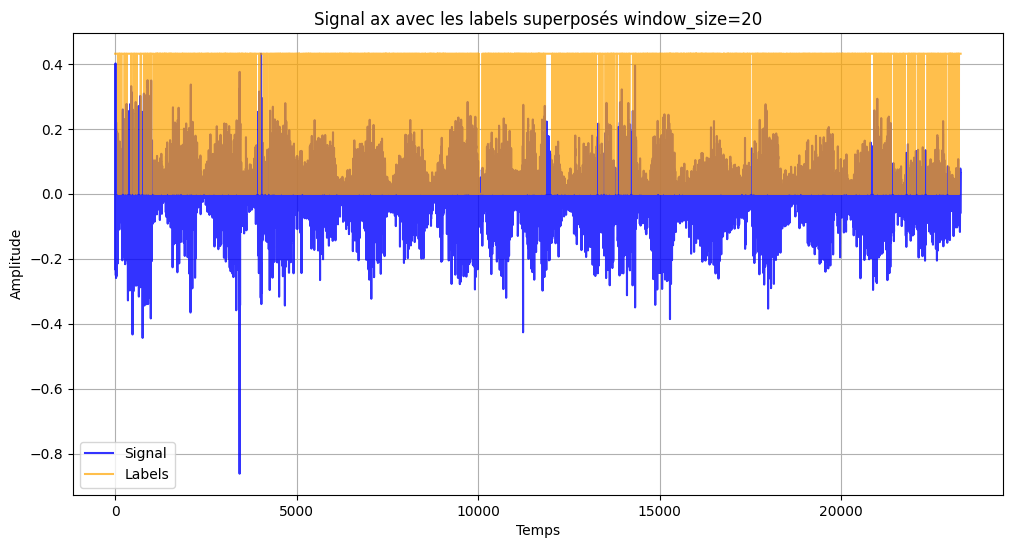

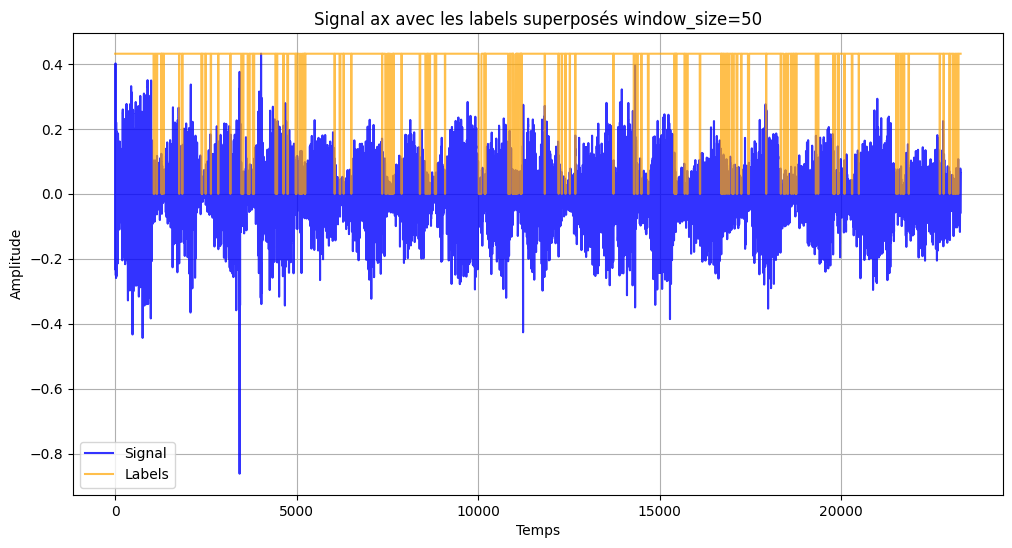

In [7]:
def plot_signal_with_labels(data, signal_col, features_file, window_size):
    # Charger les données
    data_signal = pd.read_excel(data)
    data_features = pd.read_csv(features_file)

    # Récupérer le signal
    signal = data_signal[signal_col]

    # Récupérer les colonnes start_index, end_index et labels
    start_indices = data_features['start_index']
    end_indices = data_features['end_index']
    labels = data_features['label_ax']

    # Créer une liste pour contenir les labels étendus
    labels_expanded = [0] * len(signal)  # Initialiser un tableau de zéros de la longueur du signal

    # Étendre les labels sur les plages définies par start_index et end_index
    for start, end, label in zip(start_indices, end_indices, labels):
        labels_expanded[start:end] = [label] * (end - start)

    # Convertir les labels étendus en une série pandas pour correspondre au signal
    labels_expanded = pd.Series(labels_expanded)

    # Tracer le signal
    plt.figure(figsize=(12, 6))
    plt.plot(signal, label='Signal', color='blue', alpha=0.8)

    # Superposer les labels normalisés
    labels_normalized = labels_expanded * signal.max()  # Normaliser les labels pour correspondre à l'échelle du signal
    plt.plot(labels_normalized, label='Labels', color='orange', alpha=0.7)

    # Configurer le graphique
    plt.title(f'Signal {signal_col} avec les labels superposés window_size={window_size}')
    plt.xlabel('Temps')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid()
    plt.show()

window_sizes = [20,50]

for window_size in window_sizes:
    features_file = f'Data_Preprocessed/data_1_{window_size}.csv'
    plot_signal_with_labels('Data/1.xlsx', 'ax', features_file, window_size)

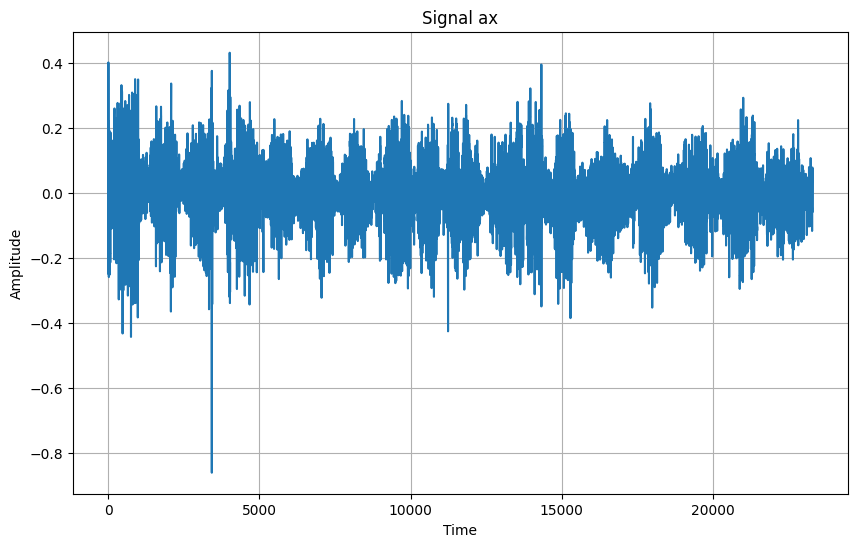

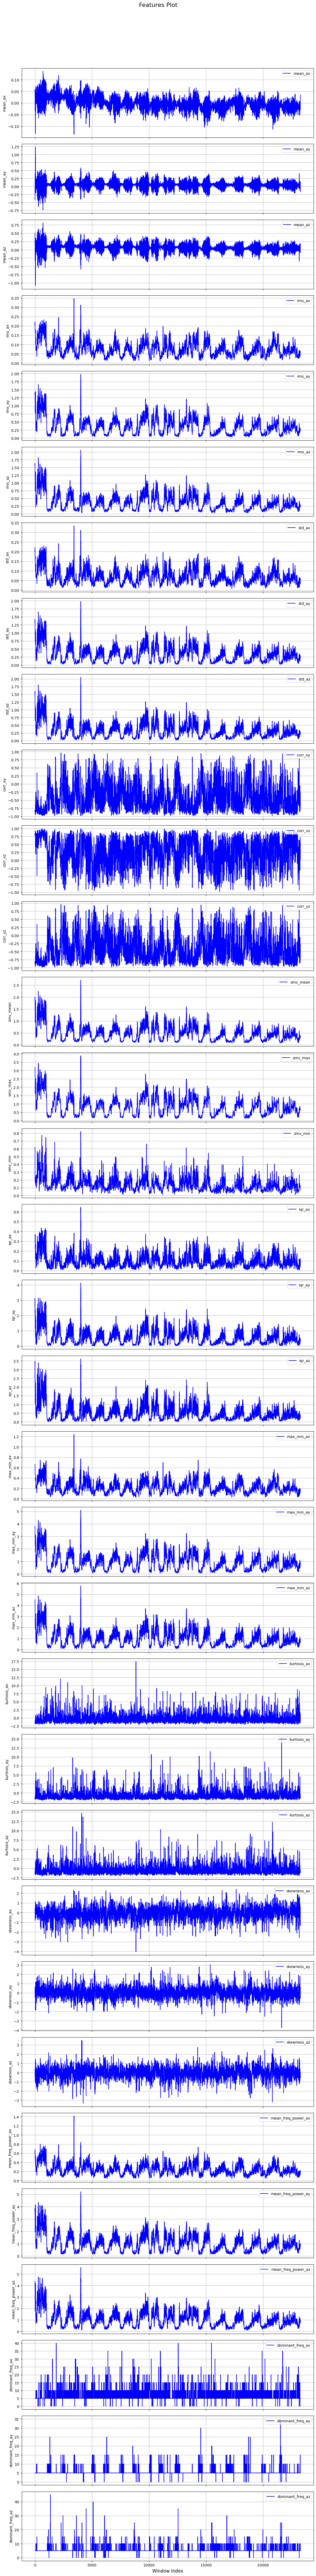

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

data1 = pd.read_excel('Data/1.xlsx')
# plotting ax signal
plt.figure(figsize=(10, 6))
plt.plot(data1['ax'])
plt.title('Signal ax')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

def plot_all_features(file_path, output_file='all_features_plot.png'):
    """
    Plot all features from the provided CSV file as subplots.
    
    Args:
        file_path (str): Path to the CSV file containing the features.
        output_file (str): Path to save the output plot image.
    """
    # Load the dataset
    data = pd.read_csv(file_path)
    
    # List of features to plot
    features = [
        'mean_ax', 'mean_ay', 'mean_az',
        'rms_ax', 'rms_ay', 'rms_az',
        'std_ax', 'std_ay', 'std_az',
        'corr_xy', 'corr_xz', 'corr_yz',
        'smv_mean', 'smv_max', 'smv_min',
        'iqr_ax', 'iqr_ay', 'iqr_az',
        'max_min_ax', 'max_min_ay', 'max_min_az',
        'kurtosis_ax', 'kurtosis_ay', 'kurtosis_az',
        'skewness_ax', 'skewness_ay', 'skewness_az',
        'mean_freq_power_ax', 'mean_freq_power_ay', 'mean_freq_power_az',
        'dominant_freq_ax', 'dominant_freq_ay', 'dominant_freq_az'
    ]
    
    # Number of features
    num_features = len(features)
    
    # Create subplots
    fig, axs = plt.subplots(num_features, 1, figsize=(12, 3 * num_features), sharex=True)
    fig.suptitle("Features Plot", fontsize=16)
    
    # Plot each feature in a separate subplot
    for i, feature in enumerate(features):
        axs[i].plot(data[feature], label=feature, color='blue')
        axs[i].set_ylabel(feature, fontsize=10)
        axs[i].grid(True)
        axs[i].legend(loc='upper right')
    
    # Set common X-axis label
    axs[-1].set_xlabel("Window Index", fontsize=12)
    
    # Adjust layout and save the plot
    plt.tight_layout(rect=[0, 0, 1, 0.96]) 
    plt.savefig(output_file)
    plt.show()


file_path = 'Data_Preprocessed/data_1_20.csv'  
plot_all_features(file_path, output_file='features_plot_all.png')

In [23]:
training_features = ['mean_ax','mean_ay','mean_az','rms_ax','rms_ay','rms_az','std_ax','std_ay','std_az','corr_xy','corr_xz','corr_yz','smv_mean','smv_max','smv_min','iqr_ax','iqr_ay','iqr_az','max_min_ax','max_min_ay','max_min_az','kurtosis_ax','kurtosis_ay','kurtosis_az','skewness_ax','skewness_ay','skewness_az','mean_freq_power_ax','mean_freq_power_ay','mean_freq_power_az','dominant_freq_ax','dominant_freq_ay','dominant_freq_az']
corr_matrix = features[training_features].corr()
corr_matrix.head(10)

,mean_ax,mean_ay,mean_az,rms_ax,rms_ay,rms_az,std_ax,std_ay,std_az,corr_xy,...,kurtosis_az,skewness_ax,skewness_ay,skewness_az,mean_freq_power_ax,mean_freq_power_ay,mean_freq_power_az,dominant_freq_ax,dominant_freq_ay,dominant_freq_az
mean_ax,1.000000,-0.423127,0.535171,0.080291,0.089362,0.141685,0.057083,0.093854,0.113467,-0.037493,...,-0.089360,-0.177418,0.176853,-0.078575,0.078487,0.092109,0.147642,0.011411,0.029798,-0.009437
mean_ay,-0.423127,1.000000,-0.925311,-0.081842,0.015060,-0.045189,-0.073996,-0.017275,-0.018674,0.108252,...,-0.013648,0.160987,-0.344652,0.240123,-0.068588,0.029645,-0.061821,0.078989,0.019406,0.015804
mean_az,0.535171,-0.925311,1.000000,-0.010497,-0.120139,-0.048157,-0.025499,-0.093091,-0.084046,0.001486,...,0.017675,-0.188860,0.332291,-0.240742,-0.016077,-0.126119,-0.030093,-0.024008,0.048238,0.050437
rms_ax,0.080291,-0.081842,-0.010497,1.000000,0.838004,0.824796,0.994898,0.841710,0.825956,-0.585929,...,-0.151604,-0.077361,-0.103705,0.155292,0.979364,0.822479,0.821885,-0.231335,-0.342232,-0.328289
rms_ay,0.089362,0.015060,-0.120139,0.838004,1.000000,0.990715,0.839906,0.998202,0.993279,-0.636223,...,-0.256416,0.001071,-0.086401,0.139592,0.816665,0.974221,0.971516,-0.240967,-0.379918,-0.388219
rms_az,0.141685,-0.045189,-0.048157,0.824796,0.990715,1.000000,0.824731,0.990648,0.997547,-0.616880,...,-0.259844,-0.014701,-0.057507,0.119555,0.804528,0.966020,0.981618,-0.231555,-0.357548,-0.364865
std_ax,0.057083,-0.073996,-0.025499,0.994898,0.839906,0.824731,1.000000,0.844426,0.827934,-0.591723,...,-0.154472,-0.074801,-0.108276,0.158804,0.975221,0.823861,0.821983,-0.233340,-0.348239,-0.334546
std_ay,0.093854,-0.017275,-0.093091,0.841710,0.998202,0.990648,0.844426,1.000000,0.994108,-0.643975,...,-0.256513,-0.004330,-0.075118,0.129988,0.820324,0.972669,0.972605,-0.242512,-0.386194,-0.392322
std_az,0.113467,-0.018674,-0.084046,0.825956,0.993279,0.997547,0.827934,0.994108,1.000000,-0.624019,...,-0.264101,-0.010462,-0.067277,0.123440,0.806219,0.969017,0.979964,-0.231418,-0.367766,-0.374541
corr_xy,-0.037493,0.108252,0.001486,-0.585929,-0.636223,-0.616880,-0.591723,-0.643975,-0.624019,1.000000,...,0.144105,-0.128153,0.041658,-0.149840,-0.561004,-0.615155,-0.614824,0.217907,0.283986,0.283835
